In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("Raw_Full_Titanic_Data.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#drop PassengerId, Name, Ticket, and Cabin

df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
# drop missing and null values -- FIX THIS

# Check for missing values
print(df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [5]:
# Convert the following categorical features to numeric using LabelEncoder
le = LabelEncoder()

# Convert 'Sex' column to numeric
df['Sex'] = le.fit_transform(df['Sex'])

# Convert 'Embarked' column to numeric
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str)) #astype(str) handles potential NaN values

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


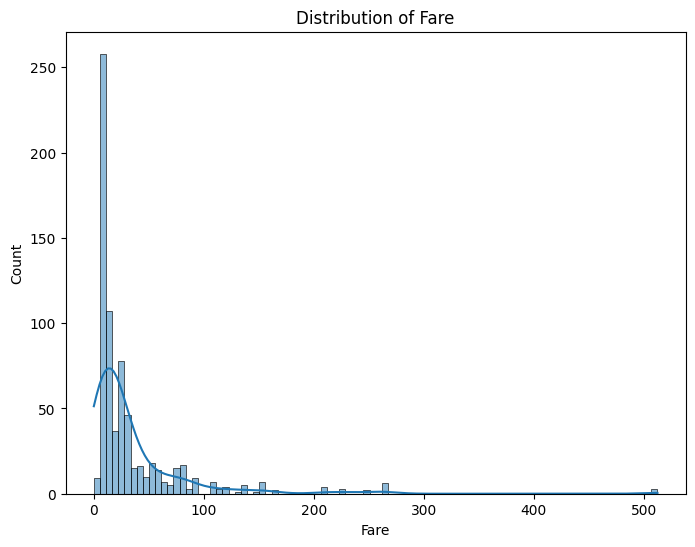

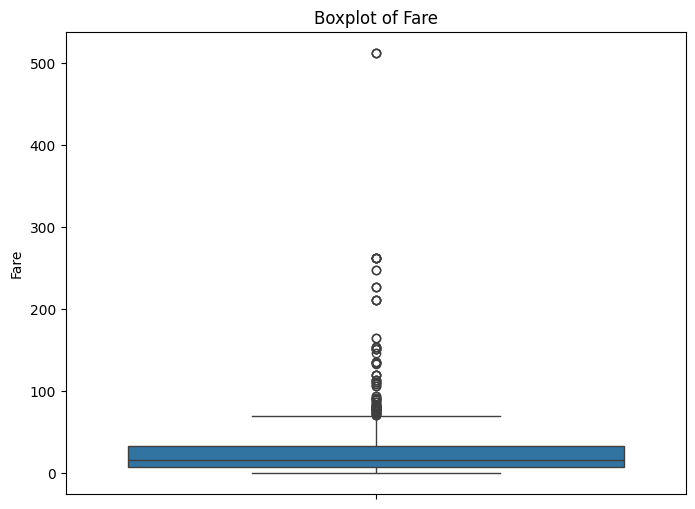

In [6]:
# Check the distribution of the 'Fare' feature
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

# Check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


In [7]:
# the boxplot is for the 'Fare' column - ancillary
# Get the quartiles
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]['Fare']

# Print the outliers
outliers

1       71.2833
27     263.0000
34      82.1708
52      76.7292
62      83.4750
         ...   
802    120.0000
820     93.5000
835     83.1583
856    164.8667
879     83.1583
Name: Fare, Length: 95, dtype: float64

In [8]:
# prompt: Let's remove the entire row where its Fare value is an outlier

# Remove rows where 'Fare' is an outlier
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Print some info
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)


Original DataFrame shape: (712, 8)
DataFrame shape after removing outliers: (617, 8)


In [9]:
df_no_outliers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2


In [10]:
# remove the Survived feature and run data normalization with the rest of features

import pandas as pd
# Remove the 'Survived' feature
df_no_outliers = df_no_outliers.drop(['Survived'], axis=1)

# Normalize the remaining features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

df_normalized.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.2,0.0,0.104618,1.0
1,1.0,0.0,0.321438,0.0,0.0,0.114358,1.0
2,0.0,0.0,0.434531,0.2,0.0,0.766234,1.0
3,1.0,1.0,0.434531,0.0,0.0,0.116162,1.0
4,0.0,1.0,0.673285,0.0,0.0,0.748377,1.0


In [11]:
# Add the Survived feature back with the the rest of features

import pandas as pd
# Concatenate 'Survived' back to the DataFrame
df_final = pd.concat([df['Survived'], df_normalized], axis=1)
df_final.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.2,0.0,0.104618,1.0
1,1.0,1.0,0.0,0.321438,0.0,0.0,0.114358,1.0
2,1.0,0.0,0.0,0.434531,0.2,0.0,0.766234,1.0
3,1.0,1.0,1.0,0.434531,0.0,0.0,0.116162,1.0
4,0.0,0.0,1.0,0.673285,0.0,0.0,0.748377,1.0


In [12]:
# split the data_final setting up for naive bayes algorithm model

from sklearn.model_selection import train_test_split

# Assuming df_final is your DataFrame
X = df_final.drop('Survived', axis=1)  # Features
y = df_final['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your Naive Bayes model
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (675, 7)
X_test shape: (169, 7)
y_train shape: (675,)
y_test shape: (169,)


In [13]:
# check for missing or null values, delete them all.

# Check for missing values again after all the operations
print(df_final.isnull().sum())

# Drop rows with any missing values in the final dataframe
df_final.dropna(inplace=True)

# Verify that there are no more missing values
print(df_final.isnull().sum())

# Split the data_final setting up for naive bayes algorithm model
X = df_final.drop('Survived', axis=1)  # Features
y = df_final['Survived']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Now you have X_train, X_test, y_train, and y_test for your Naive Bayes model
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Survived    132
Pclass      227
Sex         227
Age         227
SibSp       227
Parch       227
Fare        227
Embarked    227
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
X_train shape: (388, 7)
X_test shape: (97, 7)
y_train shape: (388,)
y_test shape: (97,)


In [14]:
#This is model generation

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

#This is to evaluate the model
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.5360824742268041


In [15]:
# Evaluation metrics with precision, recall, and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have y_test and y_pred from the previous code

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1}")

Precision: 0.34615384615384615
Recall: 0.24324324324324326
F1-score: 0.2857142857142857


Provide the new data entry. Also, the model suffers from low accuracy and reliability ratings. Rework the feature engineering to increase those ratings.  Typically, a ML engieering spent 80% of their time on feature engineering. This is when you need math and stat knowledge, know your data really well!